In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import some relative libraries
import pandas as pd
import numpy as np
import math
from numbers import Number
from scipy import stats

from sklearn.base import BaseEstimator, TransformerMixin


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, RocCurveDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline




In [3]:
#load in the data from an excel file and save in a pandas dataset
#preview the data
bean_df= pd.read_excel('my_data/Dry_Bean_Dataset.xlsx')
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
#check for data types and see if information is missing
bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
#column information and dataset taken from
#https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
#column information
"""
1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
2.) Perimeter (P): Bean circumference is defined as the length of its border.
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5.) Aspect ratio (K): Defines the relationship between L and l.
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12.)Compactness (CO): Measures the roundness of an object: Ed/L
13.)ShapeFactor1 (SF1)
14.)ShapeFactor2 (SF2)
15.)ShapeFactor3 (SF3)
16.)ShapeFactor4 (SF4)
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)
"""

'\n1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.\n2.) Perimeter (P): Bean circumference is defined as the length of its border.\n3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.\n4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.\n5.) Aspect ratio (K): Defines the relationship between L and l.\n6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.\n7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.\n8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.\n9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.\n10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.\n11.)Roundness (R): Calculated with the 

In [6]:
bean_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [7]:
bean_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [8]:
#lambda function creating column showing if instance is or isn't the target bean
bean_df['Dermason']= bean_df['Class'].apply(lambda x: 1 if x == 'DERMASON' else 0) 
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Dermason
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,0


In [9]:
#check to make sure this new Dermason column proportion matches the above proportion
bean_df['Dermason'].value_counts(normalize=True)

Dermason
0    0.739475
1    0.260525
Name: proportion, dtype: float64

In [10]:
#assign the independent variable columns
X= bean_df.drop(['Dermason','Class'], axis = 1)
#assign the dependant variable columns
y= bean_df['Dermason']

#split up the data into train and test subsets
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 24, test_size= 0.1)

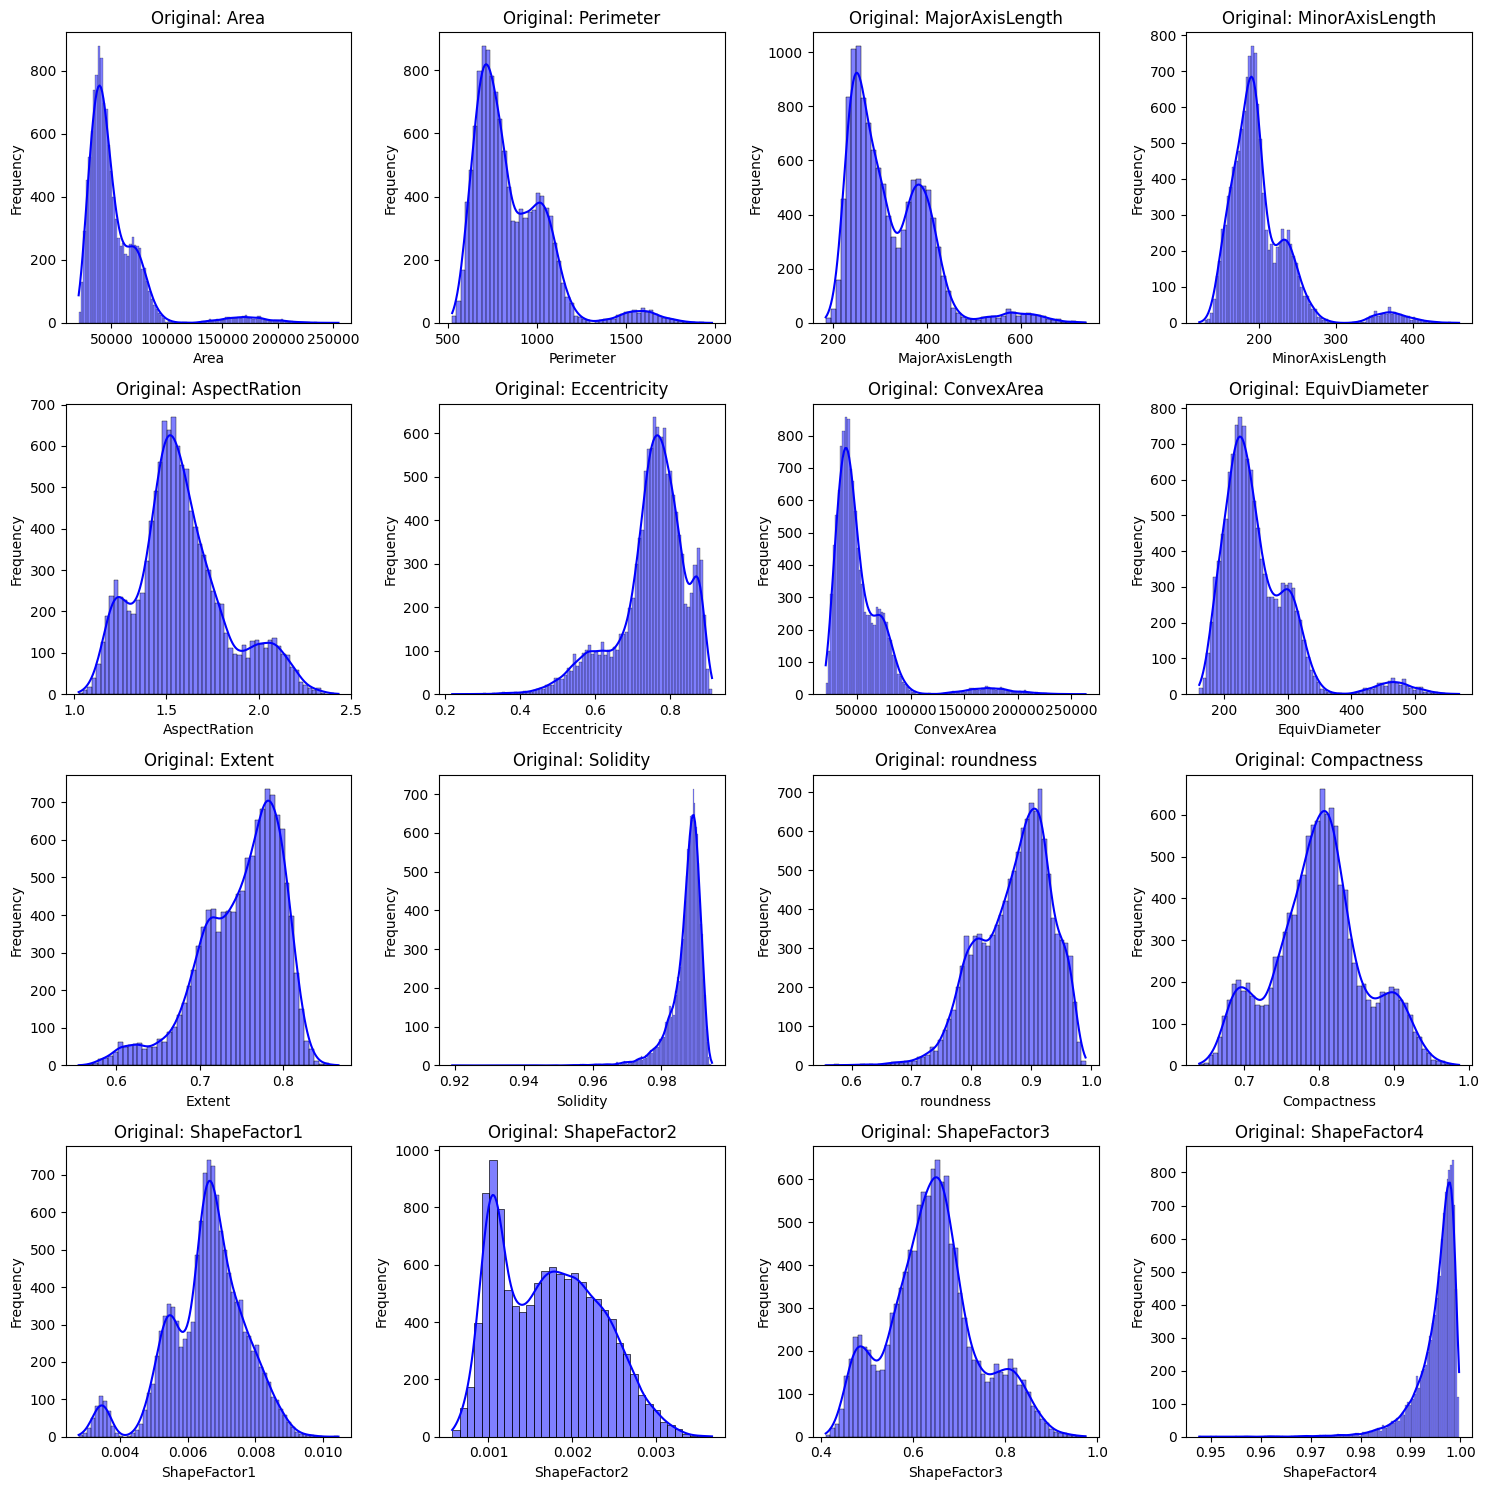

In [11]:
#check out the data distrobutions
#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

some of the data distrobutions are skewed. lets see if we can fix that.

In [12]:
def TransShift(df):
    
    LogT = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
            'EquivDiameter', 'ShapeFactor2']

    BoxCoxT = ['Eccentricity', 'Solidity', 'roundness', 'ShapeFactor4']

    Redist = pd.DataFrame()

    for col in df.columns:

        if col in LogT:
            Redist[col] = np.log1p(df[col])

        elif col in BoxCoxT:
            min_val = df[col].min()
            if min_val <= 0:
                shifted_col = df[col] - min_val + 1
            else:
                shifted_col = df[col]

            Redist[col], _ = stats.boxcox(shifted_col)

        else:
            Redist[col] = df[col]

    return Redist


In [13]:
X_train_Norm= TransShift(X_train)

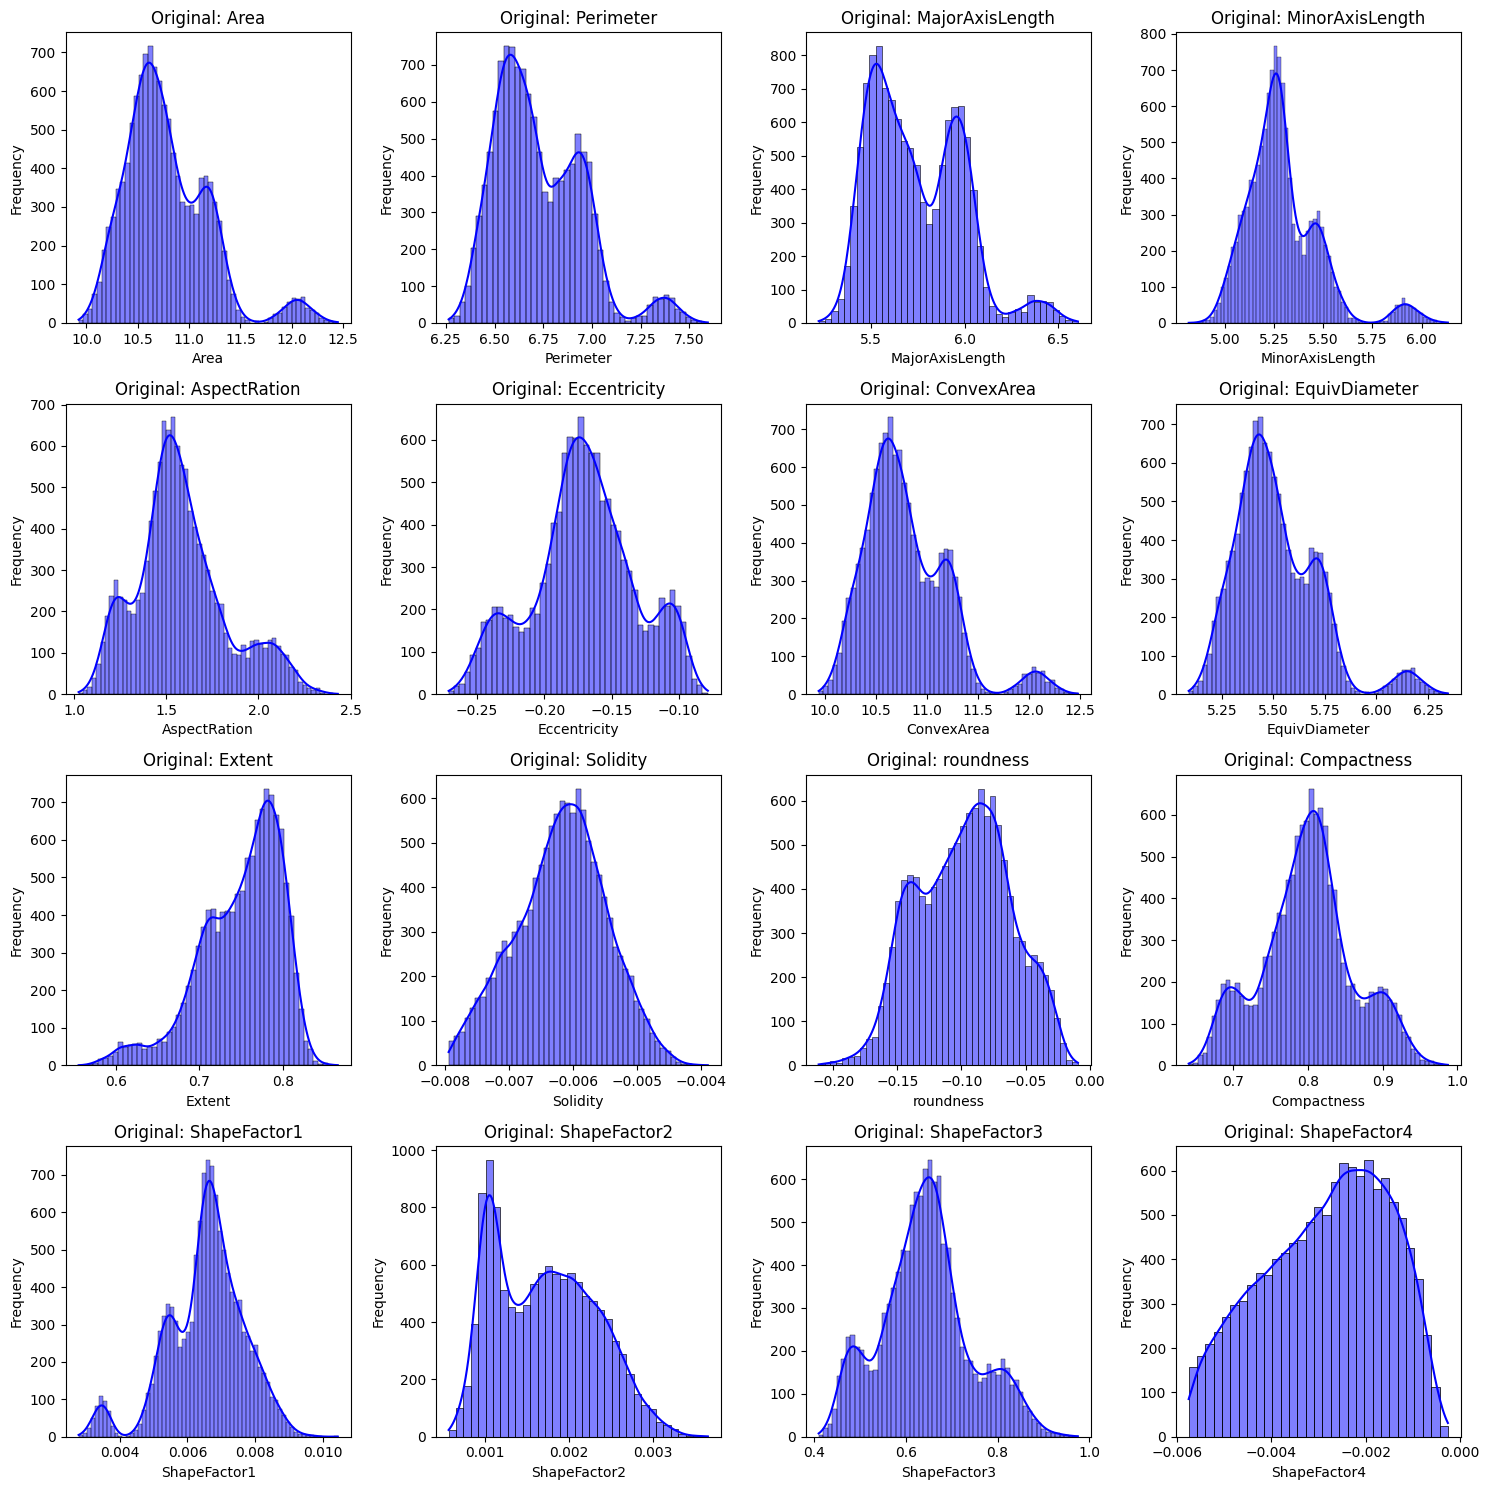

In [14]:
#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_Norm.columns):
    sns.histplot(X_train_Norm[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

create a class to iterate through all of the potential options for the different classifier methods

In [15]:
class ModelWithCV():
    def __init__(self, model_instantiator, model_name, X, y, model_kwargs = {},\
                 scaler=False, smote_and_rand_und= False, cv_now=True):
        self.model_instatiator = model_instantiator
        self.model = None
        self.model_kwargs = model_kwargs
        self.name = model_name
        self.scaler= scaler
        self.smote_and_rand_und= smote_and_rand_und
        self.X = X
        self.y = y
        self.cv_specificity_mean = None
        self.cv_precision_mean = None
        self.cv_recall_mean = None
        self.avg_conf_matrix = None
       
        self.cv_specificity_mean_train = None
        self.cv_precision_mean_train = None
        self.cv_recall_mean_train = None
        self.avg_conf_matrix_train = None
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=10):
  
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        cv_X = cv_X.values if isinstance(cv_X, pd.DataFrame) else cv_X
        cv_y = cv_y.values if isinstance(cv_y, pd.Series) else cv_y

        cv_splits = StratifiedKFold(n_splits=kfolds)
        specificity_scores_train = []
        precision_scores_train = []
        recall_scores_train = []
        specificity_scores = []
        precision_scores = []
        recall_scores = []
        total_conf_matrix = np.zeros((2, 2))  
        total_conf_matrix_train = np.zeros((2, 2))  

        if self.scaler:
            print('Scaling')

        if self.smote_and_rand_und:
            print('SMOTEing and Randomly Undersampling')
        
        for train_idx, test_idx in cv_splits.split(cv_X, cv_y):
            X_train, X_test = cv_X[train_idx], cv_X[test_idx]
            y_train, y_test = cv_y[train_idx], cv_y[test_idx]
                    
            self.model = self.model_instatiator(random_state= 24, **self.model_kwargs)
            
            if self.scaler:
                cv_scaler= self.scaler
                X_train = cv_scaler.fit_transform(X_train)
                X_test = cv_scaler.transform(X_test)

            if self.smote_and_rand_und:
                smote = SMOTE(sampling_strategy='auto', random_state=24)  
                undersample = RandomUnderSampler(sampling_strategy='auto', random_state=24)
                pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])
        
                X_train, y_train = pipeline.fit_resample(X_train, y_train)
        
            self.model.fit(X_train, y_train)
           
            y_train_pred = self.model.predict(X_train)
            y_pred = self.model.predict(X_test)

            TN_train, FP_train, FN_train, TP_train = confusion_matrix(y_train, y_train_pred).ravel()
            total_conf_matrix_train += confusion_matrix(y_train, y_train_pred)
            specificity_train = TN_train / (TN_train + FP_train) 
            specificity_scores_train.append(specificity_train)
            precision_train = precision_score(y_train, y_train_pred)
            recall_train = recall_score(y_train, y_train_pred)
            precision_scores_train.append(precision_train)
            recall_scores_train.append(recall_train)

            #validation set
            TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
            total_conf_matrix += confusion_matrix(y_test, y_pred)

            specificity = TN / (TN + FP)  
            specificity_scores.append(specificity)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision_scores.append(precision)
            recall_scores.append(recall)

        self.cv_specificity_mean_train = np.mean(specificity_scores_train)
        self.cv_precision_mean_train = np.mean(precision_scores_train)
        self.cv_recall_mean_train = np.mean(recall_scores_train)
        self.avg_conf_matrix_train = total_conf_matrix_train / kfolds
        self.cv_specificity_mean = np.mean(specificity_scores)
        self.cv_precision_mean = np.mean(precision_scores)
        self.cv_recall_mean = np.mean(recall_scores)
        self.avg_conf_matrix = total_conf_matrix / kfolds

    def print_cv_summary(self):
        cv_summary_train = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean_train:.5f}\n"
            f"Average precision: {self.cv_precision_mean_train:.5f}\n"
            f"Average recall: {self.cv_recall_mean_train:.5f}")
        print('###TRAIN###')
        print(cv_summary_train)
       
        cv_summary_val = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean:.5f}\n"
            f"Average precision: {self.cv_precision_mean:.5f}\n"
            f"Average recall: {self.cv_recall_mean:.5f}")
        print('###VAL###')
        print(cv_summary_val)

        return self.cv_specificity_mean, self.cv_precision_mean, self.cv_recall_mean, \
        self.model_kwargs, self.scaler, self.smote_and_rand_und
    

    def plot_avg_conf_matrix(self):
        if self.avg_conf_matrix is not None:
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix_train)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Average Train Confusion Matrix for {self.name}")
            plt.show()
           
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Average Confusion Matrix for {self.name}")
            plt.show()

# print logistic regression baseline model results

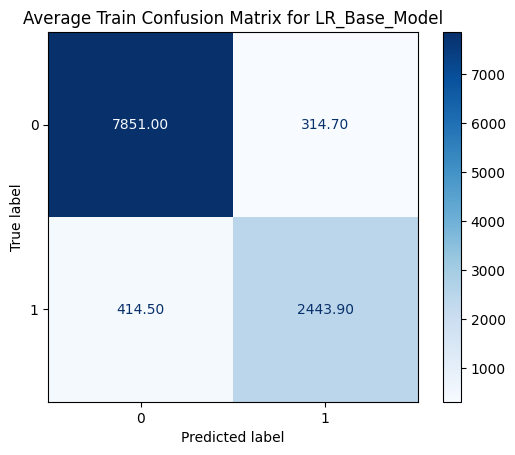

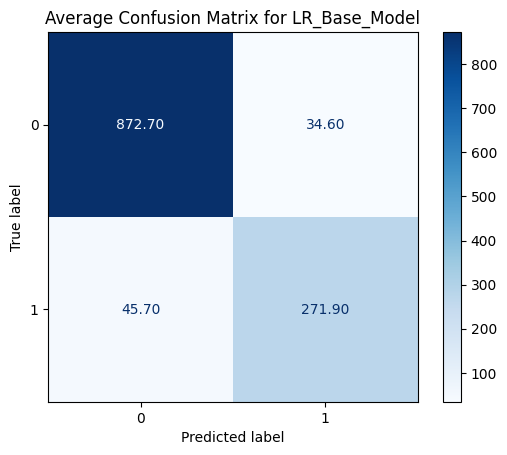

###TRAIN###
CV results for LR_Base_Model model:Average specificity: 0.96146
Average precision: 0.88582
Average recall: 0.85499
###VAL###
CV results for LR_Base_Model model:Average specificity: 0.96187
Average precision: 0.88769
Average recall: 0.85613


(0.9618657383347337, 0.887693568491631, 0.8561286034561435, {}, False, False)

In [16]:
LR_Baseline_Results= ModelWithCV(model_instantiator= LogisticRegression,
                                    model_name= 'LR_Base_Model',
                                    X= X_train,
                                    y= y_train,
                                    scaler= False,
                                    smote_and_rand_und= False
                                   )

LR_Baseline_Results.plot_avg_conf_matrix()

LR_Baseline_Results.print_cv_summary()

## print decision tree baseline model results

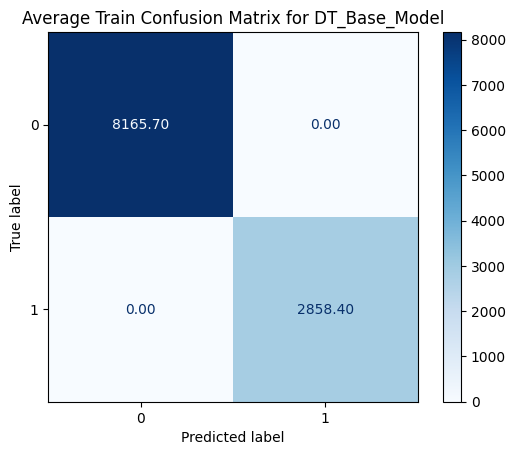

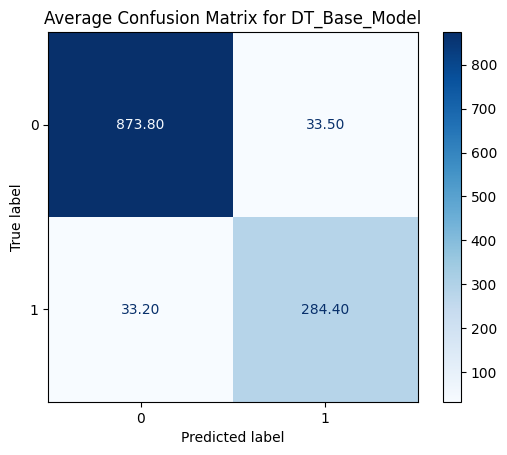

results for lr baseline:
###TRAIN###
CV results for LR_Base_Model model:Average specificity: 0.96146
Average precision: 0.88582
Average recall: 0.85499
###VAL###
CV results for LR_Base_Model model:Average specificity: 0.96187
Average precision: 0.88769
Average recall: 0.85613

results for dt baseline:
###TRAIN###
CV results for DT_Base_Model model:Average specificity: 1.00000
Average precision: 1.00000
Average recall: 1.00000
###VAL###
CV results for DT_Base_Model model:Average specificity: 0.96308
Average precision: 0.89476
Average recall: 0.89546


(0.9630782849010874, 0.8947636683015476, 0.8954595956589886, {}, False, False)

In [18]:
#instantiate the class
DT_Baseline_Results= ModelWithCV(model_instantiator= DecisionTreeClassifier,
                                    model_name= 'DT_Base_Model',
                                    X= X_train,
                                    y= y_train,
                                    scaler= False,
                                    smote_and_rand_und= False
                                   )

DT_Baseline_Results.plot_avg_conf_matrix()

print('results for lr baseline:')
LR_Baseline_Results.print_cv_summary()
print()
print('results for dt baseline:')
DT_Baseline_Results.print_cv_summary()

unline the logistic regression model, the current decision tree model is clearly overfitting to the training data, but the decision tree model's validation set is outperforming both the training and validation set of the logistic regression model.

lets run an optimization grid search on both of these models to see which of the two perform the best after being properly tuned to the dataset.

## tune logistic regression via grid search

In [ ]:
lr_metric_tracker= []

data_sets= [X_train, X_train_Norm]
C= [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000,
                10000000, 100000000, 1000000000]
int_fit= [True, False]
solver = ['liblinear', 'saga', 'lbfgs']
smote= [True, False]
scaler= [False, StandardScaler(), MinMaxScaler()]

for data in data_sets:
    for fit in int_fit:
        for sm in smote:
            for sc in scaler:        
                for c in C:
                    for solver in solvers:
                        model_kwargs= {'C': c, 'solver': solver, 'fit_intercept': fit, 'penalty': 'l2' }
                        print(model_kwargs)
                        #instantiate the class
                        temp= ModelWithCV(model_instantiator= LogisticRegression,
                                                            model_name= 'Tuned_LR_Model',
                                                            X= data,
                                                            y= y_train,
                                                            scaler= sc,
                                                            smote_and_rand_und= sm,
                                                            model_kwargs= model_kwargs
                                                           )
                        
                        lr_metric_tracker.append((temp.print_cv_summary(), data, scaler))
                        
                        print()
                        print('#### NEXT ITERATION###')

In [ ]:
pd.DataFrame(metric_tracker)

In [ ]:
lr_val_grid_search= pd.DataFrame(metric_tracker)

lr_new_col_names= ['v_avg_spec', 'v_avg_prec', 'v_avg_rec', 'v_hyp_para', 'v_MM_scaled', 'v_SM_RU']

lr_val_grid_search.columns= lr_new_col_names

lr_val_grid_search.head()

In [ ]:
lr_val_grid_search_SpecPrec_sorted = lr_val_grid_search.sort_values(\
    by=['v_avg_spec', 'v_avg_prec', 'v_avg_rec'], ascending=[False, False, False])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

lr_val_grid_search_SpecPrec_sorted

In [ ]:
lr_val_grid_search_PrecSpec_sorted = lr_val_grid_search.sort_values(\
    by=['v_avg_prec', 'v_avg_spec', 'v_avg_rec'], ascending=[False, False, False])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

lr_val_grid_search_PrecSpec_sorted

# tune decision tree via grid search 

In [ ]:
dt_metric_tracker= []

data_sets= [X_train]
max_depths= list(range(1,33))
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
criterions = ['gini', 'entropy', 'log_loss']
min_samples_leafs = np.linspace(0.01, 0.5, 10, endpoint=True)
max_feature_num = list(range(1, X_train_SR.shape[1]))
smote= [True, False]
scaler= [False]

for data in data_sets:
    for depth in max_depths:
        for sm in smote:
            for sc in scaler:        
                for fit in int_fit:
                    for samp_split in min_samples_splits:
                        for solver in solvers:
                            for crit in criterions:
                                for samp_leafs in min_samples_leafs:
                                    for num_feat in max_feature_num:
                                        model_kwargs= {'max_depth': depth, min_samples_split'= samp_split, 
                                                        criterion= crit, min_samples_leaf= samp_leafs, 
                                                        max_features= num_feat}
                                        print(model_kwargs)
                                        #instantiate the class
                                        temp= ModelWithCV(model_instantiator= DecisionTreeClassifier,
                                                                            model_name= 'Tuned_DT_Model',
                                                                            X= data,
                                                                            y= y_train,
                                                                            scaler= sc,
                                                                            smote_and_rand_und= sm,
                                                                            model_kwargs= model_kwargs
                                                                           )
                                        
                                        dt_metric_tracker.append(temp.print_cv_summary())
                                        
                                        print()
                                        print('#### NEXT ITERATION###')

## pick the final most effective model

# run the final model on the test data

In [ ]:
final_model= dt_SR_Tuned_A

#Smote and Randomly undersample the training data
X_train_SR, y_train_SR= Smote_and_RandUndS(X_train, y_train)

final_model.fit(X_train_SR, y_train_SR)

In [ ]:
class Model_with_final():
    def __init__(self, model, model_name, X_train, y_train, X_test, y_test):
        self.model = model
        self.name = model_name
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.final_results = None
        self.final_accuracy = None
        self.final_specificity = None
        self.final_precision = None
        self.final_recall = None
        self.final_conf_matrix = None
        
        # Train the model and make predictions on the final test set
        self.train_and_evaluate()

    def train_and_evaluate(self):
        """
        Train the model on the training data and evaluate on the test data.
        """
        # Train the model on the training data
        self.model.fit(self.X_train, self.y_train)
        
        # Predict on the test data
        y_pred = self.model.predict(self.X_test)
        
        # Compute performance metrics on the test set
        self.final_accuracy = accuracy_score(self.y_test, y_pred)
        
        # Compute the confusion matrix
        self.final_conf_matrix = confusion_matrix(self.y_test, y_pred)
        
        # Compute specificity (TN / (TN + FP))
        TN, FP, FN, TP = self.final_conf_matrix.ravel()
        self.final_specificity = TN / (TN + FP)
        
        # Compute precision and recall
        self.final_precision = precision_score(self.y_test, y_pred)
        self.final_recall = recall_score(self.y_test, y_pred)
        
        self.final_results = {
            'Accuracy': self.final_accuracy,
            'Specificity': self.final_specificity,
            'Precision': self.final_precision,
            'Recall': self.final_recall
        }

    def print_final_summary(self):
        """
        Print the final results (accuracy, specificity, precision, recall).
        """
        print(f"Final results for {self.name} model on X_test:")
        print(f"Accuracy: {self.final_accuracy:.5f}")
        print(f"Specificity: {self.final_specificity:.5f}")
        print(f"Precision: {self.final_precision:.5f}")
        print(f"Recall: {self.final_recall:.5f}")

    def plot_conf_matrix(self):
        """
        Plot the confusion matrix using ConfusionMatrixDisplay.
        """
        if self.final_conf_matrix is not None:
            disp = ConfusionMatrixDisplay(confusion_matrix=self.final_conf_matrix)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Confusion Matrix for {self.name} on X_test")
            plt.show()
        else:
            print("Confusion matrix is not available. Please run model evaluation first.")
            

In [ ]:
#instantiate the class
Final_Model_Results= Model_with_final(model= dt_SR_Tuned_A,
                                    model_name= 'Final_Model: Smoted/Randomly Undersampled and Tuned Decision Tree model',
                                    X_train = X_train_SR,
                                    y_train = y_train_SR,
                                     X_test = X_test,
                                     y_test = y_test)
Final_Model_Results.plot_conf_matrix()

lr_MM_SR_tuned_model_results.print_cv_summary()
Dt_SR_model_results.print_cv_summary()
Final_Model_Results.print_final_summary()